# <span style="color:#F72585"><center>Funciones de Activación</center></span>

<figure>
<center>
<img src="https://raw.githubusercontent.com/AprendizajeProfundo/Alejandria/main/Redes_Neuronales/Imagenes/640px-Activate_The_Rainbow_Generator_-_Flickr_-_JD_Hancock.jpg" width="600" height="400" align="center" /> 
</center>   
</figure>
<center>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Activate_The_Rainbow_Generator_-_Flickr_-_JD_Hancock.jpg">JD Hancock from Austin, TX, United States</a>, <a href="https://creativecommons.org/licenses/by/2.0">CC BY 2.0</a>, via Wikimedia Commons

</center>

## <span style="color:#4361EE">Introducción</span>

Como vimos anteriormente, la red neuronal tiene neuronas que trabajan en consonancia con sus pesos, su sesgo y su respectiva función de activación. En el modo de entrenamiento, se actualizan los pesos y sesgos de las neuronas sobre la base del error en la salida. Este proceso se conoce como `retropropagación` (backpropagation). Las funciones de activación permiten la retropropagación y los gradientes se suministran junto con el error para actualizar los pesos y sesgos.

La función de activación de un nodo define la salida de ese nodo dada una entrada o un conjunto de entradas. La función de activación decide si una neurona debe activarse o no calculando la suma ponderada y agregando más sesgo con ella. 

**El propósito de la función de activación es introducir no linealidad en la salida de una neurona**.

### <span style="color:#4CC9F0">¿Por qué necesitamos funciones de activación? </span>

Una red neuronal sin una función de activación es esencialmente un modelo de regresión lineal clásico. La función de activación realiza la transformación no lineal de la entrada, lo que la hace capaz de aprender y realizar tareas más complejas.

## <span style="color:#4361EE">Funciones de activación clásicas</span> 

En la entrada, una neurona artificial calcula una "suma ponderada" de su entrada y agrega un sesgo. Como antes, sea $ z = \sum_i x_iw_i + b $, $ z  \in \mathcal {R} $. Una vez calculado el valor $ z $, la neurona artificial decide si se debe "disparar" o no, basándose en el valor de $ z $.

### <span style="color:#4CC9F0">Función Step</span>

Lo primero que nos viene a la mente es ¿qué tal una función de activación basada en umbrales? Si el valor de $ z $ está por encima de cierto valor, declare que se ha `activado`. Si es menor que el umbral, diga que no.
El umbral más común es 0. La *función de activación Step* se define como

$$
f(x) = Step(x) \begin{cases}
1, &\text{ if } x \ge 0,\\
0, &\text{ en otro caso }
\end{cases}
$$

Observe la figura 1. Obviamente, $f'(x) = 0$ for $x\ne 0$.

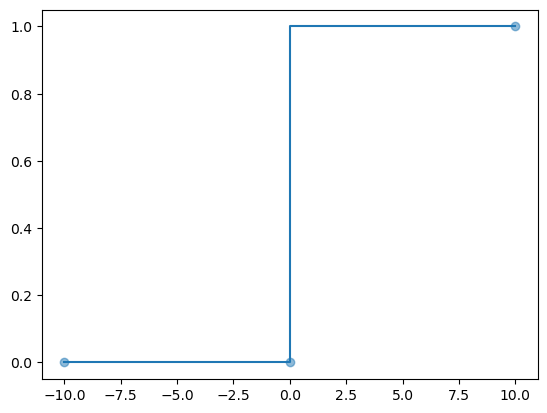

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = (-10,0, 10)
y = (0,0,1)

plt.step(x, y , where='pre')
plt.plot(x, y , 'C0o', alpha=0.5)
plt.show()

**Figura 1.** *Función de activación Step.*

### <span style="color:#4CC9F0">Activación lineal</span>

La función de activación lineal está definida por $ f (x) = ax $. Tenga en cuenta que $ f '(x) = a $, para todos $ x \in \mathcal {R} $. Tenga en cuenta que $ - \infty \le f (x) \le \infty $.

La función de activación lineal se utiliza en un solo lugar, es decir, la capa de salida. El efecto de esta función de activación es simplemente escalar los valores provenientes de la última capa oculta, para que se ajusten a los valores objetivo.

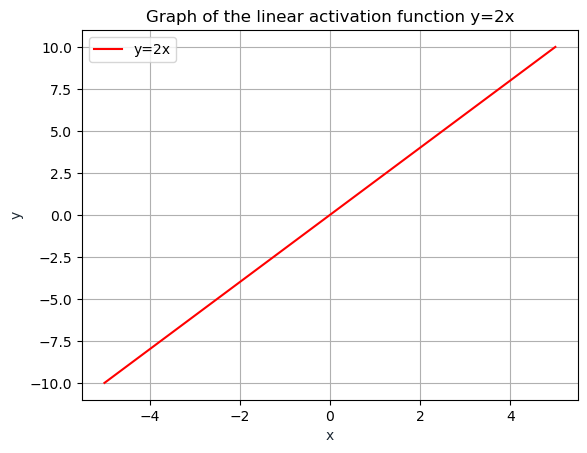

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5,5,100)
y = 2*x
plt.plot(x, y, '-r', label='y=2x')
plt.title('Graph of the linear activation function y=2x')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()

**Figure 4.** Linear activation function

### <span style="color:#4CC9F0">Funciones de activación tipo sigmoide</span>

Son funciones cuyo gráfico tiene una  forma de "S" alargada. Hay varios tipos de funciones sigmoideas. Las más utilizadas son las funciones logísticas y tangentes hiperbólicas.

#### <span style="color:#4CC9F0">Función logística (sigmoid)</span>


Esta función es definida por

$$
f(x) = sigmoid(x) =\frac{1}{{1+ e^{-x}}},
$$
para $x\in \mathcal{R}$. 

#### <span style="color:#4CC9F0">Ejercicio</span>


Verifique que

1. $0 \le f(x)\le 1$.
2. $f'(x)= f(x)*(1-f(x))$ 

Por lo general, $ f (x) $ se usa en la capa de salida de una clasificación binaria, donde el resultado es 0 o 1, ya que el valor de la función sigmoidea se encuentra entre 0 y 1, por lo que el resultado se puede predecir fácilmente como 1 si el valor es mayor. que 0,5 y 0 en caso contrario.

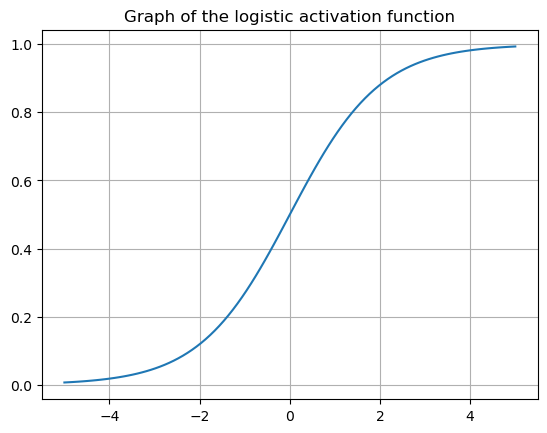

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def logistic(x):
    return (1/(1+np.exp(-x)))
x = np.linspace(-5,5,100)
plt.title('Graph of the logistic activation function')
plt.plot(x,logistic(x) )
plt.grid()
plt.show()


#### <span style="color:#4CC9F0">Función de activacion Tangente hiperbólica</span>


La activación que funciona casi siempre mejor que la función sigmoidea es la función *tanh* también conocida como función tangente hiperbólica . En realidad, es una versión matemáticamente modificada de la función sigmoidea. Ambos son similares y pueden obtenerse una de la otra entre sí.


La función *Tanh* está definida por

$$
f(x) = tanh(x) = \frac{2}{{1+ e^{-2x}}}-1,
$$
para  $x\in \mathcal{R}$. 

#### <span style="color:#4CC9F0">Ejercicio</span>


Verifique que

1. $-1 \le f(x)\le 1$.
2. $f'(x)= 1 -f(x)^2$.
3. $tanh(x) = 2 sigmoid(2x) -1$.

Tanh se usa generalmente en capas ocultas de una red neuronal, ya que sus valores se encuentran entre -1 a 1, por lo que la media de la capa oculta resulta ser 0 o muy cerca de ella,  lo que ayuda a centrar los datos al acercar la media a 0. Esto facilita mucho el aprendizaje de la siguiente capa.

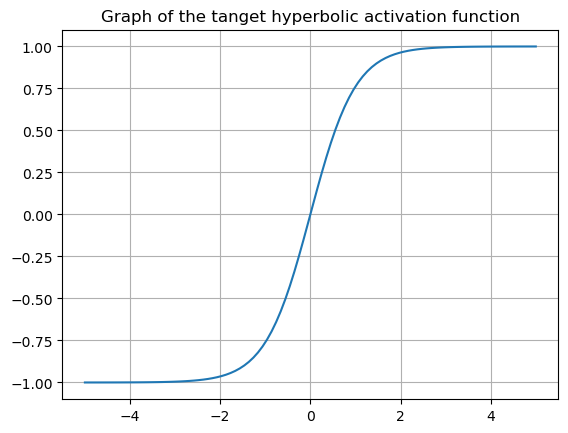

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
    return (2/(1+np.exp(-2*x))-1)
x = np.linspace(-5,5,100)
plt.title('Graph of the tanget hyperbolic activation function')
plt.plot(x,tanh(x) )
plt.grid()
plt.show()

#### <span style="color:#4CC9F0">Función de activación Unidad de rectificación lineal (ReLu)</span>


*ReLu* es la función de activación más utilizada actualmente. Implementada principalmente en capas ocultas de la red neuronal. *ReLu* se define como

$$
f(x) = ReLu(x) = max(0,x),
$$
para $x\in \mathcal{R}$. 

#### <span style="color:#4CC9F0">Ejercicio</span>


Verifique que

1. $0\le f(x)< \infty$
2. $f'(x)= 1$ for $x > 0$, and  $f'(x)= 0$ for $x < 0$.

*ReLu* es menos costosa computacionalmente que *Tanh* y *sigmoide* porque involucra operaciones matemáticas más simples. A la vez, solamente se activan unas pocas neuronas, lo que hace que la red sea dispersa, lo que la hace eficiente y fácil de calcular. En palabras simples, *ReLu* permite a la red aprender mucho más rápido que la funciones *sigmoide* y *Tanh*.

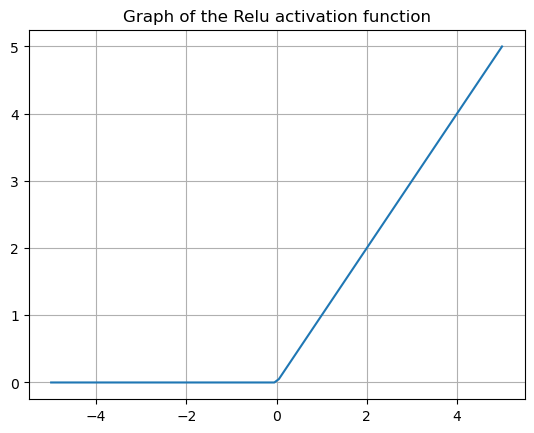

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Relu(x):
    y= np.zeros(x.shape)
    return np.ndarray.flatten(np.max([[y],[x]], axis =0))

x = np.linspace(-5,5,100)
plt.title('Graph of the Relu activation function')
plt.plot(x,Relu(x))
plt.grid()
plt.show()

#### <span style="color:#4CC9F0">Función de activación Softmax </span>


La función softmax también es un tipo de función sigmoidea, pero es útil cuando intentamos manejar problemas de clasificación.

Generalmente se usa cuando se intenta manejar múltiples clases. La función softmax comprime las salidas para cada clase a valores entre 0 y 1 al dividir cada valor por la suma de las salidas (modificadas mediante una función exponencial).

La función softmax se usa idealmente en la capa de salida del clasificador donde realmente estamos tratando de alcanzar las probabilidades para definir la categoría que corresponde de cada entrada. Formalmente la función softmax es definida como sigue-



Sea $x=(x_1,\ldots,x_n)^t \in \mathbb{R}^n$. Softmax es una función $S: \mathbb{R}^n \to \mathbb{R}^n$ definida por

$$
S(x) : \begin{pmatrix} x_1 \\ \vdots \\x_n\\ \end{pmatrix}    \to \begin{pmatrix} S_1 \\ \vdots \\S_n\\ \end{pmatrix}
$$

en donde

$$
S_j = \frac{e^{x_j}}{\sum_{k=1}^N e^{x_k}}.
$$



Dado que $ S $ es una función vectorial de $ \mathbb {R} ^ n $ a $ \mathbb {R} ^ n $, la derivada es la matriz jacobiana dada por

$$
DS = \begin{pmatrix} D_1 S_1 &\cdots& D_1S_n\\
                     \cdots & \ddots & \cdots\\
                     D_n S_1 & \cdots & D_n S_n
     \end{pmatrix} 
$$

Luego de unos simples cálculos se llega a que  

$$
D_j S_i =  S_i(\delta_{ij}-S_j),
$$ 

en donde  $\delta_{ij}$ es llamado el delta de Kroneker definido por

$$
\delta_{ij} = \begin{cases} 1, &\text{si } i=j\\
                            0, & \text{isi } i\ne j
               \end{cases}              
$$


El siguiente fragmento de código muestra cómo implementar $ DS $ en Python


#### <span style="color:#4CC9F0">Ejercicio</span>


Verifique la ecuación anterior.

In [6]:
# derivative (grad) of the softmax function
def softmax_grad(s):
    # input s is softmax value of the original input x. Its shape is (1,n) 
    # i.e.  s = np.array([0.3,0.7]),  x = np.array([0,1])

    # make the matrix whose size is n^2.
    jacobian_m = np.diag(s)

    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = s[i] * (1 - s[i])
            else: 
                jacobian_m[i][j] = -s[i] * s[j]
    return jacobian_m

# testing the function
import numpy as np
import scipy.special


x = np.array([1, 2])
scipy.special.softmax(x)
softmax_grad(scipy.special.softmax(x))

array([[ 0.19661193, -0.19661193],
       [-0.19661193,  0.19661193]])

### <span style="color:#4CC9F0">Seleccionando una función de activación</span>


La `regla básica de combate` es que si realmente no sabe qué función de activación usar, simplemente use RELU, ya que es una función de activación general y se usa en la mayoría de los casos en estos días.
Si su salida es para clasificación binaria, la función sigmoidea es una elección muy natural para la capa de salida.

## <span style="color:#4361EE">Estado del arte. Variaciones de la función de activación de ReLu</span> 

En una red neuronal, la función de activación es responsable de transformar la entrada ponderada sumada del nodo en la activación del nodo o salida para esa entrada.

La función de activación *ReLU* es una función lineal por partes que tiene como salida a la entrada directamente si es positiva; de lo contrario, dará salida a cero. Se ha convertido en la función de activación predeterminada para muchos tipos de redes neuronales porque un modelo que la usa es más fácil de entrenar y, a menudo, logra un mejor rendimiento. En una red neuronal, la función de activación es responsable de transformar la entrada de pesos desde el nodo en la activación de la salida del nodo para dicha entrada.



#### <span style="color:#4CC9F0">Limitaciones de las funciones de activación sigmoide y Tanh</span>


Se prefieren las funciones de activación no lineales, ya que permiten que los nodos aprendan estructuras más complejas en los datos. Tradicionalmente, dos funciones de activación no lineales ampliamente utilizadas son las funciones de activación tangente sigmoidea e hiperbólica.


Un problema general con las funciones *sigmoide* y *Tanh* es que *saturan* en los extremos. Esto significa que los valores grandes se ajustan a 1 y los valores pequeños a -1 (Tanh) o 0 (sigmoide) respectivamente. Además, las funciones solo son realmente sensibles a los cambios alrededor del punto medio de su entrada, como 0.5 para sigmoide y 0.0 para Tanh.

La sensibilidad y saturación limitadas de la función ocurren independientemente de si la activación sumada del nodo proporcionado como entrada contiene información útil o no. Una vez saturado, se vuelve un desafío para el algoritmo de aprendizaje seguir adaptando los pesos para mejorar el rendimiento del modelo.

$ \to$ Las unidades sigmoidales se saturan en la mayor parte de su dominio: se saturan a un valor alto cuando $ z $ es muy positivo, se saturan a un valor bajo cuando $ z $ es muy negativo y solo son muy sensibles a su entrada cuando z está cerca de 0.


Finalmente, a medida que la capacidad del hardware aumentó con el uso de las GPU, las redes neuronales muy profundas que utilizan funciones de activación sigmoidea y tanh, no se pueden entrenar fácilmente.

Las capas profundas en redes grandes que utilizan estas funciones de activación no lineales no reciben información de gradiente útil. El error que se propaga a través de la red y que se usa para actualizar los peso hace que el gradiente de la red sufra de uno de dos problemas.

- Tiende a ser cero (el gradiente se desvanece).
- Tiende a ser infinito (el gradiente explota).

Los gradientes que desvanecen o que explotan hacen que sea difícil saber en qué dirección deben moverse los parámetros para mejorar la función de pérdida.


### <span style="color:#4CC9F0">Evitando que los  gradientes desaparezcan mediante el uso de la función de activación ReLU</span>

Para utilizar el descenso de gradiente estocástico con retropropagación de errores para entrenar redes neuronales profundas, se necesita `una función de activación que se vea y actúe como una función lineal`, pero que sea, de hecho, una función no lineal que permita aprender relaciones complejas en los datos.

La función también debe proporcionar más sensibilidad a la entrada de suma de activación y evitar una fácil saturación.

La solución había estado dando vueltas en el campo durante algún tiempo, aunque no se destacó hasta que algunos artículos de 2009 y 2011 arrojaron luz sobre ella.

La solución es utilizar la **función de activación lineal rectificada**, o *ReLU* para abreviar.

Un nodo o unidad que implementa esta función de activación se conoce como unidad de activación lineal rectificada, o ReLU. A menudo, las redes que utilizan la función rectificadora para las capas ocultas se denominan redes rectificadas.

$\leadsto$ La adopción de ReLU puede considerarse fácilmente **uno de los pocos hitos en la revolución del aprendizaje profundo**, p. ej. las técnicas que ahora permiten el desarrollo rutinario de redes neuronales muy profundas.

Debido a que las unidades lineales rectificadas son casi lineales, conservan muchas de las propiedades que hacen que los modelos lineales sean fáciles de optimizar con métodos basados en gradientes. También conservan muchas de las propiedades que hacen que los modelos lineales generalicen bien.

#### <span style="color:#4CC9F0">Ventaja de la función de activación ReLU</span>


La función de activación lineal rectificada se ha convertido rápidamente en la función de activación predeterminada al desarrollar la mayoría de los tipos de redes neuronales.

Como tal, es importante tomarse un momento para revisar algunos de los beneficios del enfoque, destacados por primera vez por Xavier Glorot, et al. en su documento histórico de 2012 sobre el uso de ReLU titulado [Deep Sparse Rectifier Neural Networks](https://proceedings.mlr.press/v15/glorot11a/glorot11a.pdf).

1. **Simplicidad computacional**. La función del rectificador es trivial de implementar y requiere una función max(). Esto es diferente a la función de activación sigmoidea y tanh que requieren el uso de un cálculo exponencial.
2. **Escasa representación**. Un beneficio importante de la función de rectificador es que es capaz de generar un valor cero verdadero. Esto es diferente a las funciones de activación tanh y sigmoidea que aprenden a aproximarse a una salida muy cercana a cero, pero no un verdadero valor cero. Esto significa que las entradas negativas pueden generar valores cero verdaderos, lo que permite la activación de capas ocultas en redes neuronales para contener uno o más valores cero verdaderos. Esto se denomina representación dispersa y es una propiedad deseable en el aprendizaje representacional, ya que puede acelerar el aprendizaje y simplificar el modelo.
3. **Comportamiento lineal**. La función rectificadora se ve y actúa principalmente como una función de activación lineal. En general, una red neuronal es más fácil de optimizar cuando su comportamiento es lineal o casi lineal.
4. **Entrene redes profundas**. Es importante destacar que el (re) descubrimiento y la adopción de la función de activación lineal rectificada significó que se hizo posible explotar las mejoras en el hardware y entrenar con éxito redes profundas de múltiples capas con una función de activación no lineal mediante retropropagación.

#### <span style="color:#4CC9F0">Extensiones y alternativas para ReLU</span>


El ReLU tiene algunas limitaciones. Una de las principales limitaciones de ReLU es el caso en el que las actualizaciones de gran peso pueden significar que la entrada sumada a la función de activación es siempre negativa, independientemente de la entrada a la red.

Esto significa que un nodo con este problema siempre generará un valor de activación de 0.0. Esto se conoce como un "ReLU moribundo".

Algunas extensiones populares de ReLU relajan la salida no lineal de la función para permitir pequeños valores negativos de alguna manera.

### <span style="color:#4CC9F0">ReLU parametrizada (PReLu), 2015</span>

La función de activación PRelu es definida por

$$
\begin{equation*}
f(y_i) = \begin{cases} y_i, & \text{ si } y_i > 0\\
a_i y_i, & \text{ if } y_i \le 0 \end{cases}
\end{equation*}
$$

Aquí $ y_i $ es la entrada de la activación no lineal $ f $ en el $ i $ -ésimo
canal, y $ a_i $ es un coeficiente que controla la pendiente del
parte negativa. El subíndice i en ai indica que permitimos
la activación no lineal para variar en diferentes canales.

Observe que

1. $f(y_i) = max(0,y_i) + a_i min(0,y_i)$
2.$
\begin{equation*}
f'(y_i) = \begin{cases} 1, & \text{ si } y_i > 0\\
a_i , & \text{ si } y_i \le 0 \end{cases}
\end{equation*}
$

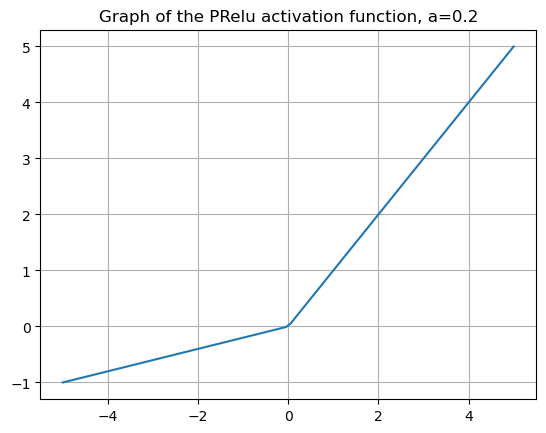

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def PRelu(a, x):
    y= np.zeros(x.shape)
    return np.ndarray.flatten(np.max([[y],[x]], axis =0)) + a*np.ndarray.flatten(np.min([[y],[x]], axis =0))

x = np.linspace(-5,5,100)
a = 0.2
plt.title('Graph of the PRelu activation function, a=0.2')
plt.plot(x,PRelu(a,x))
plt.grid()
plt.show()

#### <span style="color:#4CC9F0">Función de activación Elu, 2016</span>

Elu es definida como

$$
\begin{equation*}
f(x) = \begin{cases} x, & \text{ si } x > 0\\
\alpha (\exp(x)-1), & \text{ if } x \le 0 \end{cases}
\end{equation*}
$$

Observe que
$$
\begin{equation*}
f'(x) = \begin{cases} 1, & \text{ si } x > 0\\
f(x)+\alpha, & \text{ if } x \le 0 \end{cases}
\end{equation*}
$$

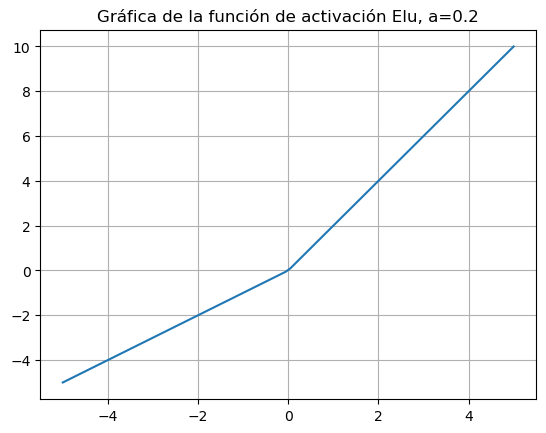

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Elu(a, x):
    y= np.zeros(x.shape)
    return np.ndarray.flatten(np.max([[y],[x]], axis =0)) + a*np.ndarray.flatten(np.min([a*(np.exp([x]) -1),[x]], axis =0))

x = np.linspace(-5,5,100)
a = 1.0
plt.title('Gráfica de la función de activación Elu, a=0.2')
plt.plot(x,Elu(a,x))
plt.grid()
plt.show()

La siguiente tabla tomada de [Wikipedia](https://en.wikipedia.org/wiki/Activation_function) presenta las funciones de activación mas conocidas.

<table class="wikitable sortable bs-exportable exportable">

<tbody><tr>
<th>Name
</th>
<th class="unsortable">Plot
</th>
<th>Function, <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle f(x)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f(x)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/202945cce41ecebb6f643f31d119c514bec7a074" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:4.418ex; height:2.843ex;" alt="f(x)"/></span>
</th>
<th><a href="/wiki/Derivative" title="Derivative">Derivative</a> of <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle f}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>f</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/132e57acb643253e7810ee9702d9581f159a1c61" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.671ex; width:1.279ex; height:2.509ex;" alt="f"/></span>, <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle f'(x)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>f</mi>
          <mo>&#x2032;</mo>
        </msup>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f'(x)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d0cd7d7c75340e779d82658e19d1720ce84ab127" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:5.144ex; height:3.009ex;" alt="f&#039;(x)"/></span>
</th>
<th><a href="/wiki/Interval_(mathematics)#Notations_for_intervals" title="Interval (mathematics)">Range</a>
</th>
<th><a href="/wiki/Smoothness#Order_of_continuity" title="Smoothness">Order of continuity</a>
</th></tr>
<tr>
<td><a href="/wiki/Identity_function" title="Identity function">Identity</a>
</td>
<td><a href="/wiki/File:Activation_identity.svg" class="image"><img alt="Activation identity.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Activation_identity.svg/120px-Activation_identity.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Activation_identity.svg/180px-Activation_identity.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Activation_identity.svg/240px-Activation_identity.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle x}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/87f9e315fd7e2ba406057a97300593c4802b53e4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.33ex; height:1.676ex;" alt="x"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle 1}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mn>1</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/92d98b82a3778f043108d4e20960a9193df57cbf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.162ex; height:2.176ex;" alt="1"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-\infty ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-\infty ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0c8c11c44279888c9e395eeb5f45d121348ae10a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:9.299ex; height:2.843ex;" alt="(-\infty ,\infty )"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td><a href="/wiki/Heaviside_step_function" title="Heaviside step function">Binary step</a>
</td>
<td><a href="/wiki/File:Activation_binary_step.svg" class="image"><img alt="Activation binary step.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Activation_binary_step.svg/120px-Activation_binary_step.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Activation_binary_step.svg/180px-Activation_binary_step.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Activation_binary_step.svg/240px-Activation_binary_step.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mn>0</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/5620555e698f283ad8d1db03be0bb1ec5e3bba25" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:13.51ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}0&amp;{\text{if }}x\neq 0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mn>0</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2260;<!-- ≠ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>undefined</mtext>
                  </mrow>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>=</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}0&amp;{\text{if }}x\neq 0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/035155c3d067d90da5c17df00d70406d06e8c285" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:22.233ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}0&amp;{\text{if }}x\neq 0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \{0,1\}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo fence="false" stretchy="false">{</mo>
        <mn>0</mn>
        <mo>,</mo>
        <mn>1</mn>
        <mo fence="false" stretchy="false">}</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \{0,1\}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/28de5781698336d21c9c560fb1cbb3fb406923eb" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:5.684ex; height:2.843ex;" alt="\{0,1\}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{-1}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mo>&#x2212;<!-- − --></mo>
            <mn>1</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{-1}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/fbeead216a363d09a6d0a05e192bdc3e7ed1067f" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:4.131ex; height:2.676ex;" alt="{\displaystyle C^{-1}}"/></span>
</td></tr>
<tr>
<td><a href="/wiki/Logistic_function" title="Logistic function">Logistic</a>, sigmoid, or soft<span class="nowrap">&#160;</span>step
</td>
<td><a href="/wiki/File:Activation_logistic.svg" class="image"><img alt="Activation logistic.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/120px-Activation_logistic.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/180px-Activation_logistic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/240px-Activation_logistic.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03C3;<!-- σ --></mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mn>1</mn>
            <mrow>
              <mn>1</mn>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b2a78e39c42d7d51c4041d142740a7719e55b314" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; width:15.941ex; height:5.509ex;" alt="{\displaystyle \sigma (x)={\frac {1}{1+e^{-x}}}}"/></span><sup class="reference plainlinks nourlexpansion" id="ref_logistic1"><a class="external autonumber" href="https://en.wikipedia.org/wiki/Activation_function#endnote_logistic1">[1]</a></sup>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle f(x)(1-f(x))}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">(</mo>
        <mn>1</mn>
        <mo>&#x2212;<!-- − --></mo>
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle f(x)(1-f(x))}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4c31efde5f30f83edf924af9feb31f0eb59d1a98" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:14.647ex; height:2.843ex;" alt="{\displaystyle f(x)(1-f(x))}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (0,1)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mn>0</mn>
        <mo>,</mo>
        <mn>1</mn>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (0,1)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c79c6838e423c1ed3c7ea532a56dc9f9dae8290b" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:5.168ex; height:2.843ex;" alt="(0,1)"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td>Hyperbolic tangent (<a href="/wiki/Hyperbolic_function#Hyperbolic_tangent" class="mw-redirect" title="Hyperbolic function">tanh</a>)
</td>
<td><a href="/wiki/File:Activation_tanh.svg" class="image"><img alt="Activation tanh.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/120px-Activation_tanh.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/180px-Activation_tanh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Activation_tanh.svg/240px-Activation_tanh.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>tanh</mi>
        <mo>&#x2061;<!-- ⁡ --></mo>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>=</mo>
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>&#x2212;<!-- − --></mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
            <mrow>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/f8e81902c8d71b06c246769bad0fe17c9cf1efd9" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; width:20.357ex; height:5.843ex;" alt="{\displaystyle \tanh(x)={\frac {e^{x}-e^{-x}}{e^{x}+e^{-x}}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle 1-f(x)^{2}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mn>1</mn>
        <mo>&#x2212;<!-- − --></mo>
        <mi>f</mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <msup>
          <mo stretchy="false">)</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle 1-f(x)^{2}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/2bb42f038020ac20689657ce6f6f683296554e1f" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:9.475ex; height:3.176ex;" alt="{\displaystyle 1-f(x)^{2}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-1,1)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>1</mn>
        <mo>,</mo>
        <mn>1</mn>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-1,1)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e120a3bd60fc89b495dd7ef6039465b7e6a703b1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:6.976ex; height:2.843ex;" alt="(-1,1)"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td><a href="/wiki/Rectifier_(neural_networks)" title="Rectifier (neural networks)">Rectified linear unit</a> (ReLU)<sup id="cite_ref-9" class="reference"><a href="#cite_note-9">&#91;9&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_rectified_linear.svg" class="image"><img alt="Activation rectified linear.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/180px-Activation_rectified_linear.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/240px-Activation_rectified_linear.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{aligned}&amp;{\begin{cases}0&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}\\{}={}&amp;\max\{0,x\}=x{\textbf {1}}_{x&gt;0}\end{aligned}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true">
            <mtr>
              <mtd />
              <mtd>
                <mrow class="MJX-TeXAtom-ORD">
                  <mrow>
                    <mo>{</mo>
                    <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
                      <mtr>
                        <mtd>
                          <mn>0</mn>
                        </mtd>
                        <mtd>
                          <mrow class="MJX-TeXAtom-ORD">
                            <mtext>if&#xA0;</mtext>
                          </mrow>
                          <mi>x</mi>
                          <mo>&#x2264;<!-- ≤ --></mo>
                          <mn>0</mn>
                        </mtd>
                      </mtr>
                      <mtr>
                        <mtd>
                          <mi>x</mi>
                        </mtd>
                        <mtd>
                          <mrow class="MJX-TeXAtom-ORD">
                            <mtext>if&#xA0;</mtext>
                          </mrow>
                          <mi>x</mi>
                          <mo>&gt;</mo>
                          <mn>0</mn>
                        </mtd>
                      </mtr>
                    </mtable>
                    <mo fence="true" stretchy="true" symmetric="true"></mo>
                  </mrow>
                </mrow>
              </mtd>
            </mtr>
            <mtr>
              <mtd>
                <mrow class="MJX-TeXAtom-ORD">

                </mrow>
                <mo>=</mo>
                <mrow class="MJX-TeXAtom-ORD">

                </mrow>
              </mtd>
              <mtd>
                <mi></mi>
                <mo movablelimits="true" form="prefix">max</mo>
                <mo fence="false" stretchy="false">{</mo>
                <mn>0</mn>
                <mo>,</mo>
                <mi>x</mi>
                <mo fence="false" stretchy="false">}</mo>
                <mo>=</mo>
                <mi>x</mi>
                <msub>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mrow class="MJX-TeXAtom-ORD">
                      <mtext mathvariant="bold">1</mtext>
                    </mrow>
                  </mrow>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mi>x</mi>
                    <mo>&gt;</mo>
                    <mn>0</mn>
                  </mrow>
                </msub>
              </mtd>
            </mtr>
          </mtable>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{aligned}&amp;{\begin{cases}0&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}\\{}={}&amp;\max\{0,x\}=x{\textbf {1}}_{x&gt;0}\end{aligned}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/281532984565d3931de1cd1edc6e006d59fc67f4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -4.005ex; width:23.452ex; height:9.176ex;" alt="{\displaystyle {\begin{aligned}&amp;{\begin{cases}0&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}\\{}={}&amp;\max\{0,x\}=x{\textbf {1}}_{x&gt;0}\end{aligned}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mn>0</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&gt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>undefined</mtext>
                  </mrow>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>=</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7def1a8bcfe903e95398e0a77542b0b096dae3cf" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.671ex; width:22.556ex; height:8.509ex;" alt="{\displaystyle {\begin{cases}0&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\{\text{undefined}}&amp;{\text{if }}x=0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle [0,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">[</mo>
        <mn>0</mn>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle [0,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8dc2d914c2df66bc0f7893bfb8da36766650fe47" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:6.072ex; height:2.843ex;" alt="[0,\infty )"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7c14274cad45f7c22b662e7a4e56b1db052883d1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.852ex; height:2.676ex;" alt="C^0"/></span>
</td></tr>
<tr>
<td>Gaussian Error Linear Unit (GELU)<sup id="cite_ref-ReferenceA_4-1" class="reference"><a href="#cite_note-ReferenceA-4">&#91;4&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_gelu.png" class="image" title="Visualization of the Gaussian Error Linear Unit (GELU)"><img alt="Visualization of the Gaussian Error Linear Unit (GELU)" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Activation_gelu.png/120px-Activation_gelu.png" decoding="async" width="120" height="80" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Activation_gelu.png/180px-Activation_gelu.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Activation_gelu.png/240px-Activation_gelu.png 2x" data-file-width="1200" data-file-height="800" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{aligned}&amp;{\frac {1}{2}}x\left(1+{\text{erf}}\left({\frac {x}{\sqrt {2}}}\right)\right)\\{}={}&amp;x\Phi (x)\end{aligned}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mtable columnalign="right left right left right left right left right left right left" rowspacing="3pt" columnspacing="0em 2em 0em 2em 0em 2em 0em 2em 0em 2em 0em" displaystyle="true">
            <mtr>
              <mtd />
              <mtd>
                <mrow class="MJX-TeXAtom-ORD">
                  <mfrac>
                    <mn>1</mn>
                    <mn>2</mn>
                  </mfrac>
                </mrow>
                <mi>x</mi>
                <mrow>
                  <mo>(</mo>
                  <mrow>
                    <mn>1</mn>
                    <mo>+</mo>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mtext>erf</mtext>
                    </mrow>
                    <mrow>
                      <mo>(</mo>
                      <mrow class="MJX-TeXAtom-ORD">
                        <mfrac>
                          <mi>x</mi>
                          <msqrt>
                            <mn>2</mn>
                          </msqrt>
                        </mfrac>
                      </mrow>
                      <mo>)</mo>
                    </mrow>
                  </mrow>
                  <mo>)</mo>
                </mrow>
              </mtd>
            </mtr>
            <mtr>
              <mtd>
                <mrow class="MJX-TeXAtom-ORD">

                </mrow>
                <mo>=</mo>
                <mrow class="MJX-TeXAtom-ORD">

                </mrow>
              </mtd>
              <mtd>
                <mi>x</mi>
                <mi mathvariant="normal">&#x03A6;<!-- Φ --></mi>
                <mo stretchy="false">(</mo>
                <mi>x</mi>
                <mo stretchy="false">)</mo>
              </mtd>
            </mtr>
          </mtable>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{aligned}&amp;{\frac {1}{2}}x\left(1+{\text{erf}}\left({\frac {x}{\sqrt {2}}}\right)\right)\\{}={}&amp;x\Phi (x)\end{aligned}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/36c937195a62f5db3de7bbadf3990d2356dd2470" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -4.171ex; width:25.388ex; height:9.509ex;" alt="{\displaystyle {\begin{aligned}&amp;{\frac {1}{2}}x\left(1+{\text{erf}}\left({\frac {x}{\sqrt {2}}}\right)\right)\\{}={}&amp;x\Phi (x)\end{aligned}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \Phi (x)+x\phi (x)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi mathvariant="normal">&#x03A6;<!-- Φ --></mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
        <mo>+</mo>
        <mi>x</mi>
        <mi>&#x03D5;<!-- ϕ --></mi>
        <mo stretchy="false">(</mo>
        <mi>x</mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \Phi (x)+x\phi (x)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/bb43f09e198e0ef8e01fa00096ef3008100531f5" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:13.512ex; height:2.843ex;" alt="{\displaystyle \Phi (x)+x\phi (x)}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-0.17\ldots ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>0.17</mn>
        <mo>&#x2026;<!-- … --></mo>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-0.17\ldots ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6c15eea6a98f95d0a273d74ac6a4d491bf279b44" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:14.607ex; height:2.843ex;" alt="{\displaystyle (-0.17\ldots ,\infty )}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td>Softplus<sup id="cite_ref-10" class="reference"><a href="#cite_note-10">&#91;10&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_softplus.svg" class="image"><img alt="Activation softplus.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Activation_softplus.svg/120px-Activation_softplus.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Activation_softplus.svg/180px-Activation_softplus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/72/Activation_softplus.svg/240px-Activation_softplus.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \ln \left(1+e^{x}\right)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>ln</mi>
        <mo>&#x2061;<!-- ⁡ --></mo>
        <mrow>
          <mo>(</mo>
          <mrow>
            <mn>1</mn>
            <mo>+</mo>
            <msup>
              <mi>e</mi>
              <mrow class="MJX-TeXAtom-ORD">
                <mi>x</mi>
              </mrow>
            </msup>
          </mrow>
          <mo>)</mo>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \ln \left(1+e^{x}\right)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a8cca29e3bdc9be84b90b9fcde7d23d9019cdc31" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:10.007ex; height:2.843ex;" alt="{\displaystyle \ln \left(1+e^{x}\right)}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\frac {1}{1+e^{-x}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mn>1</mn>
            <mrow>
              <mn>1</mn>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\frac {1}{1+e^{-x}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/a0730f7ecb26c15b341f9410687d23d0939977af" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; width:8.374ex; height:5.509ex;" alt="{\displaystyle {\frac {1}{1+e^{-x}}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (0,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mn>0</mn>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (0,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/da17102e4ed0886686094ee531df040d2e86352a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:6.329ex; height:2.843ex;" alt="(0,\infty )"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td>Exponential linear unit (ELU)<sup id="cite_ref-11" class="reference"><a href="#cite_note-11">&#91;11&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_elu.svg" class="image"><img alt="Activation elu.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Activation_elu.svg/120px-Activation_elu.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Activation_elu.svg/180px-Activation_elu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Activation_elu.svg/240px-Activation_elu.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}\alpha \left(e^{x}-1\right)&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                  <mrow>
                    <mo>(</mo>
                    <mrow>
                      <msup>
                        <mi>e</mi>
                        <mrow class="MJX-TeXAtom-ORD">
                          <mi>x</mi>
                        </mrow>
                      </msup>
                      <mo>&#x2212;<!-- − --></mo>
                      <mn>1</mn>
                    </mrow>
                    <mo>)</mo>
                  </mrow>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2264;<!-- ≤ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&gt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}\alpha \left(e^{x}-1\right)&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0f409bbcde02f828392ce0db27105ac46cc41477" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:22.29ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}\alpha \left(e^{x}-1\right)&amp;{\text{if }}x\leq 0\\x&amp;{\text{if }}x&gt;0\end{cases}}}"/></span>
<dl><dd>with parameter <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \alpha }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03B1;<!-- α --></mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \alpha }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b79333175c8b3f0840bfb4ec41b8072c83ea88d3" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.488ex; height:1.676ex;" alt="\alpha "/></span></dd></dl>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\1&amp;{\text{if }}x=0{\text{ and }}\alpha =1\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                  <msup>
                    <mi>e</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mi>x</mi>
                    </mrow>
                  </msup>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&gt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>=</mo>
                  <mn>0</mn>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>&#xA0;and&#xA0;</mtext>
                  </mrow>
                  <mi>&#x03B1;<!-- α --></mi>
                  <mo>=</mo>
                  <mn>1</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\1&amp;{\text{if }}x=0{\text{ and }}\alpha =1\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/928d2cf6b7b334bad1f3177cfa75202da302ee96" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.671ex; width:27.071ex; height:8.509ex;" alt="{\displaystyle {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x&gt;0\\1&amp;{\text{if }}x=0{\text{ and }}\alpha =1\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-\alpha ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi>&#x03B1;<!-- α --></mi>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-\alpha ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9a966cc9f5c4412bfc563ac9790d9ed43177bfdd" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:8.463ex; height:2.843ex;" alt="{\displaystyle (-\alpha ,\infty )}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}C^{1}&amp;{\text{if }}\alpha =1\\C^{0}&amp;{\text{otherwise}}\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <msup>
                    <mi>C</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mn>1</mn>
                    </mrow>
                  </msup>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>&#x03B1;<!-- α --></mi>
                  <mo>=</mo>
                  <mn>1</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <msup>
                    <mi>C</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mn>0</mn>
                    </mrow>
                  </msup>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>otherwise</mtext>
                  </mrow>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}C^{1}&amp;{\text{if }}\alpha =1\\C^{0}&amp;{\text{otherwise}}\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/98153cab376da330237e4a712fe848ae44dbced6" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:17.246ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}C^{1}&amp;{\text{if }}\alpha =1\\C^{0}&amp;{\text{otherwise}}\end{cases}}}"/></span>
</td></tr>
<tr>
<td>Scaled exponential linear unit (SELU)<sup id="cite_ref-12" class="reference"><a href="#cite_note-12">&#91;12&#93;</a></sup>
</td>
<td>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \lambda {\begin{cases}\alpha (e^{x}-1)&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03BB;<!-- λ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                  <mo stretchy="false">(</mo>
                  <msup>
                    <mi>e</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mi>x</mi>
                    </mrow>
                  </msup>
                  <mo>&#x2212;<!-- − --></mo>
                  <mn>1</mn>
                  <mo stretchy="false">)</mo>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \lambda {\begin{cases}\alpha (e^{x}-1)&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b5f46708e4a264b8f1bb18b177b389c08e33c30f" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:23.258ex; height:6.176ex;" alt="{\displaystyle \lambda {\begin{cases}\alpha (e^{x}-1)&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
<dl><dd>with parameters <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \lambda =1.0507}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03BB;<!-- λ --></mi>
        <mo>=</mo>
        <mn>1.0507</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \lambda =1.0507}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/740e4b3506d22e67bfc7bfd3e995d53bb81b3327" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:10.913ex; height:2.176ex;" alt="{\displaystyle \lambda =1.0507}"/></span> and <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \alpha =1.67326}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03B1;<!-- α --></mi>
        <mo>=</mo>
        <mn>1.67326</mn>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \alpha =1.67326}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/169a7cbcf6cf284fa0e53c32238fa079f5147325" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:12.208ex; height:2.176ex;" alt="{\displaystyle \alpha =1.67326}"/></span></dd></dl>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \lambda {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03BB;<!-- λ --></mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                  <msup>
                    <mi>e</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mi>x</mi>
                    </mrow>
                  </msup>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \lambda {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/6e70f5d905524d91daaff606a6e7b409479ed6f9" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:17.446ex; height:6.176ex;" alt="{\displaystyle \lambda {\begin{cases}\alpha e^{x}&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-\lambda \alpha ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi>&#x03BB;<!-- λ --></mi>
        <mi>&#x03B1;<!-- α --></mi>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-\lambda \alpha ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e1357562409324a8c59d68435f87b4acb04d2045" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:9.818ex; height:2.843ex;" alt="{\displaystyle (-\lambda \alpha ,\infty )}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7c14274cad45f7c22b662e7a4e56b1db052883d1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.852ex; height:2.676ex;" alt="C^0"/></span>
</td></tr>
<tr>
<td>Leaky rectified linear unit (Leaky ReLU)<sup id="cite_ref-13" class="reference"><a href="#cite_note-13">&#91;13&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_prelu.svg" class="image"><img alt="Activation prelu.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/120px-Activation_prelu.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/180px-Activation_prelu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/240px-Activation_prelu.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}0.01x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mn>0.01</mn>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}0.01x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/ae7d94c8e173aa0a742c9d8cef64d6b64830926e" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:17.811ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}0.01x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}0.01&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mn>0.01</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}0.01&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7d33d15f95972e19f5ab5c67cb0a596762fd8ada" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:16.481ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}0.01&amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-\infty ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-\infty ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0c8c11c44279888c9e395eeb5f45d121348ae10a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:9.299ex; height:2.843ex;" alt="(-\infty ,\infty )"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7c14274cad45f7c22b662e7a4e56b1db052883d1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.852ex; height:2.676ex;" alt="C^0"/></span>
</td></tr>
<tr>
<td>Parameteric rectified linear unit (PReLU)<sup id="cite_ref-14" class="reference"><a href="#cite_note-14">&#91;14&#93;</a></sup>
</td>
<td><a href="/wiki/File:Activation_prelu.svg" class="image"><img alt="Activation prelu.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/120px-Activation_prelu.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/180px-Activation_prelu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ae/Activation_prelu.svg/240px-Activation_prelu.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}\alpha x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mi>x</mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}\alpha x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/c3a5ba694377a9623afaec3b5356616242d3b98e" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:15.164ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}\alpha x&amp;{\text{if }}x&lt;0\\x&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
<dl><dd>with parameter <span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle \alpha }">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>&#x03B1;<!-- α --></mi>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle \alpha }</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b79333175c8b3f0840bfb4ec41b8072c83ea88d3" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:1.488ex; height:1.676ex;" alt="\alpha "/></span></dd></dl>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\begin{cases}\alpha &amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mrow>
            <mo>{</mo>
            <mtable columnalign="left left" rowspacing=".2em" columnspacing="1em" displaystyle="false">
              <mtr>
                <mtd>
                  <mi>&#x03B1;<!-- α --></mi>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&lt;</mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
              <mtr>
                <mtd>
                  <mn>1</mn>
                </mtd>
                <mtd>
                  <mrow class="MJX-TeXAtom-ORD">
                    <mtext>if&#xA0;</mtext>
                  </mrow>
                  <mi>x</mi>
                  <mo>&#x2265;<!-- ≥ --></mo>
                  <mn>0</mn>
                </mtd>
              </mtr>
            </mtable>
            <mo fence="true" stretchy="true" symmetric="true"></mo>
          </mrow>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\begin{cases}\alpha &amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e18e0768b83bced2a28b7bea9937939e66323dd7" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:13.835ex; height:6.176ex;" alt="{\displaystyle {\begin{cases}\alpha &amp;{\text{if }}x&lt;0\\1&amp;{\text{if }}x\geq 0\end{cases}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (-\infty ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (-\infty ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0c8c11c44279888c9e395eeb5f45d121348ae10a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:9.299ex; height:2.843ex;" alt="(-\infty ,\infty )"/></span><sup class="reference plainlinks nourlexpansion" id="ref_alpha"><a class="external autonumber" href="https://en.wikipedia.org/wiki/Activation_function#endnote_alpha">[2]</a></sup>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{0}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mn>0</mn>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{0}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7c14274cad45f7c22b662e7a4e56b1db052883d1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:2.852ex; height:2.676ex;" alt="C^0"/></span>
</td></tr>
<tr>
<td>Sigmoid linear unit (SiLU,<sup id="cite_ref-ReferenceA_4-2" class="reference"><a href="#cite_note-ReferenceA-4">&#91;4&#93;</a></sup> Sigmoid shrinkage,<sup id="cite_ref-refssbs1_15-0" class="reference"><a href="#cite_note-refssbs1-15">&#91;15&#93;</a></sup> SiL,<sup id="cite_ref-16" class="reference"><a href="#cite_note-16">&#91;16&#93;</a></sup> or Swish-&#8205;1<sup id="cite_ref-17" class="reference"><a href="#cite_note-17">&#91;17&#93;</a></sup>)
</td>
<td><a href="/wiki/File:Swish.svg" class="image" title="Swish Activation Function"><img alt="Swish Activation Function" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/12/Swish.svg/120px-Swish.svg.png" decoding="async" width="120" height="72" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/12/Swish.svg/180px-Swish.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/12/Swish.svg/240px-Swish.svg.png 2x" data-file-width="1000" data-file-height="600" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\frac {x}{1+e^{-x}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mi>x</mi>
            <mrow>
              <mn>1</mn>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\frac {x}{1+e^{-x}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/623852d52f9dc328d4168d79f470a3c3186730f6" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.171ex; width:8.374ex; height:5.009ex;" alt="{\displaystyle {\frac {x}{1+e^{-x}}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\frac {1+e^{-x}+xe^{-x}}{\left(1+e^{-x}\right)^{2}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mn>1</mn>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>+</mo>
              <mi>x</mi>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mo>&#x2212;<!-- − --></mo>
                  <mi>x</mi>
                </mrow>
              </msup>
            </mrow>
            <msup>
              <mrow>
                <mo>(</mo>
                <mrow>
                  <mn>1</mn>
                  <mo>+</mo>
                  <msup>
                    <mi>e</mi>
                    <mrow class="MJX-TeXAtom-ORD">
                      <mo>&#x2212;<!-- − --></mo>
                      <mi>x</mi>
                    </mrow>
                  </msup>
                </mrow>
                <mo>)</mo>
              </mrow>
              <mrow class="MJX-TeXAtom-ORD">
                <mn>2</mn>
              </mrow>
            </msup>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\frac {1+e^{-x}+xe^{-x}}{\left(1+e^{-x}\right)^{2}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/01a6a4b826d59685162b5312f5172f985169a170" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -3.171ex; width:16.078ex; height:6.843ex;" alt="{\displaystyle {\frac {1+e^{-x}+xe^{-x}}{\left(1+e^{-x}\right)^{2}}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle [-0.278\ldots ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">[</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>0.278</mn>
        <mo>&#x2026;<!-- … --></mo>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle [-0.278\ldots ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/958ab90852b76ffe763b61fd8aae0a4175ea25f1" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:15.511ex; height:2.843ex;" alt="{\displaystyle [-0.278\ldots ,\infty )}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td>Mish 
<td>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle x\tanh(\ln(1+e^{x}))}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
        <mi>tanh</mi>
        <mo>&#x2061;<!-- ⁡ --></mo>
        <mo stretchy="false">(</mo>
        <mi>ln</mi>
        <mo>&#x2061;<!-- ⁡ --></mo>
        <mo stretchy="false">(</mo>
        <mn>1</mn>
        <mo>+</mo>
        <msup>
          <mi>e</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi>x</mi>
          </mrow>
        </msup>
        <mo stretchy="false">)</mo>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x\tanh(\ln(1+e^{x}))}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e30109e9cceea5f6b732bdd7251be21201b10f4f" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:18.186ex; height:2.843ex;" alt="{\displaystyle x\tanh(\ln(1+e^{x}))}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle {\frac {(e^{x}(4e^{2x}+e^{3x}+4(1+x)+e^{x}(6+4x)))}{(2+2e^{x}+e^{2x})^{2}}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mrow class="MJX-TeXAtom-ORD">
          <mfrac>
            <mrow>
              <mo stretchy="false">(</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo stretchy="false">(</mo>
              <mn>4</mn>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>3</mn>
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>+</mo>
              <mn>4</mn>
              <mo stretchy="false">(</mo>
              <mn>1</mn>
              <mo>+</mo>
              <mi>x</mi>
              <mo stretchy="false">)</mo>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo stretchy="false">(</mo>
              <mn>6</mn>
              <mo>+</mo>
              <mn>4</mn>
              <mi>x</mi>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
              <mo stretchy="false">)</mo>
            </mrow>
            <mrow>
              <mo stretchy="false">(</mo>
              <mn>2</mn>
              <mo>+</mo>
              <mn>2</mn>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mi>x</mi>
                </mrow>
              </msup>
              <mo>+</mo>
              <msup>
                <mi>e</mi>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                  <mi>x</mi>
                </mrow>
              </msup>
              <msup>
                <mo stretchy="false">)</mo>
                <mrow class="MJX-TeXAtom-ORD">
                  <mn>2</mn>
                </mrow>
              </msup>
            </mrow>
          </mfrac>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle {\frac {(e^{x}(4e^{2x}+e^{3x}+4(1+x)+e^{x}(6+4x)))}{(2+2e^{x}+e^{2x})^{2}}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/04af231bb225292d9229140240a7f7ae9e14dd53" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.671ex; width:41.415ex; height:6.676ex;" alt="{\displaystyle {\frac {(e^{x}(4e^{2x}+e^{3x}+4(1+x)+e^{x}(6+4x)))}{(2+2e^{x}+e^{2x})^{2}}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle [-0.308\ldots ,\infty )}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">[</mo>
        <mo>&#x2212;<!-- − --></mo>
        <mn>0.308</mn>
        <mo>&#x2026;<!-- … --></mo>
        <mo>,</mo>
        <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
        <mo stretchy="false">)</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle [-0.308\ldots ,\infty )}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e82abe83a0dfe1b7eb7d9c57c59f814c8e440d83" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:15.511ex; height:2.843ex;" alt="{\displaystyle [-0.308\ldots ,\infty )}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr>
<tr>
<td><a href="/wiki/Gaussian_function" title="Gaussian function">Gaussian</a>
</td>
<td><a href="/wiki/File:Activation_gaussian.svg" class="image"><img alt="Activation gaussian.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_gaussian.svg/120px-Activation_gaussian.svg.png" decoding="async" width="120" height="60" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_gaussian.svg/180px-Activation_gaussian.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_gaussian.svg/240px-Activation_gaussian.svg.png 2x" data-file-width="120" data-file-height="60" /></a>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle e^{-x^{2}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>e</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mo>&#x2212;<!-- − --></mo>
            <msup>
              <mi>x</mi>
              <mrow class="MJX-TeXAtom-ORD">
                <mn>2</mn>
              </mrow>
            </msup>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle e^{-x^{2}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/da5decb0035215bdd45d3d40b4b2c3a158d00fc8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:4.366ex; height:3.009ex;" alt="e^{-x^{2}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle -2xe^{-x^{2}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo>&#x2212;<!-- − --></mo>
        <mn>2</mn>
        <mi>x</mi>
        <msup>
          <mi>e</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mo>&#x2212;<!-- − --></mo>
            <msup>
              <mi>x</mi>
              <mrow class="MJX-TeXAtom-ORD">
                <mn>2</mn>
              </mrow>
            </msup>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle -2xe^{-x^{2}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7da9606f8917a9a4d2120b139dd111ab6031157e" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.505ex; width:8.666ex; height:3.176ex;" alt="{\displaystyle -2xe^{-x^{2}}}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle (0,1]}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mo stretchy="false">(</mo>
        <mn>0</mn>
        <mo>,</mo>
        <mn>1</mn>
        <mo stretchy="false">]</mo>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle (0,1]}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/7e70f9c241f9faa8e9fdda2e8b238e288807d7a4" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:4.91ex; height:2.843ex;" alt="{\displaystyle (0,1]}"/></span>
</td>
<td><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML"  alttext="{\displaystyle C^{\infty }}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>C</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mi mathvariant="normal">&#x221E;<!-- ∞ --></mi>
          </mrow>
        </msup>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle C^{\infty }}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/971ed05871d69309df32efdfd2020128c9cf69d8" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.338ex; width:3.673ex; height:2.343ex;" alt="C^{\infty }"/></span>
</td></tr></tbody></table>


## <span style="color:#4361EE">Referencias</span>



1. https://dustinstansbury.github.io/theclevermachine/derivation-backpropagation
2. https://en.wikipedia.org/wiki/Activation_function
3. https://www.geeksforgeeks.org/activation-functions-neural-networks/
4. https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
5. https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/